# Training Regression on wassa data

In [36]:
emoNames = ['anger','fear','joy','sadness']
# emoNames_hashTag = ['sadness', 'disgust', 'surprise', 'anger', 'fear', 'joy']

In [37]:
from nltk.tokenize import TweetTokenizer
import nltk.tokenize.casual as casual
from drevicko.twitter_regexes import cleanString, setupRegexes, tweetPreprocessor
import preprocess_twitter

def preprocess_tweet(text):    
    text = casual.reduce_lengthening(text)
    text = cleanString(setupRegexes('twitterProAna'),text)   
    text = ' '.join([span for notentity,span in tweetPreprocessor(text, ("urls", "users", "lists")) if notentity])
    text = text.replace('\t','')
    text = text.replace('< ','<').replace(' >','>')
    text = text.replace('):', '<sadface>').replace('(:', '<smile>')
    text = text.replace(" 't", "t").replace('#','')
    return text

def tokenise_tweet(text):
    text = preprocess_twitter.tokenize(text)
    text = preprocess_tweet(text)     
    return ' '.join(text.split())

tokenise_tweet.regexes = setupRegexes('twitterProAna')

In [38]:
import subprocess

datasetList = ['http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/anger-ratings-0to1.train.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/fear-ratings-0to1.train.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/joy-ratings-0to1.train.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Train%20Data/sadness-ratings-0to1.train.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/anger-ratings-0to1.dev.gold.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/fear-ratings-0to1.dev.gold.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/joy-ratings-0to1.dev.gold.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Dev%20Data%20With%20Gold/sadness-ratings-0to1.dev.gold.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/anger-ratings-0to1.test.gold.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/fear-ratings-0to1.test.gold.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/joy-ratings-0to1.test.gold.txt',
'http://saifmohammad.com/WebDocs/EmoInt%20Test%20Gold%20Data/sadness-ratings-0to1.test.gold.txt']

# subprocess.run( ['wget'] + datasetList, stdout=subprocess.PIPE )

In [39]:
import os
import pandas as pd

def _read_csv_data(filename = "data.csv", header=True, columns=['id','tweet','emotion','label']):
    
    df = pd.DataFrame(pd.read_csv(filepath_or_buffer = filename,sep='\t',header=None))
    df.columns = columns
    
    tweets_list = []    
    for index, row in enumerate(df.iterrows()): 
        tweets_list.append(tokenise_tweet(row[1]['tweet']))     
    df['tweet'] = tweets_list

    return df

def get_input_files(directory):
    
    filenames_array = [filenames for root, dirnames, filenames in os.walk(directory)]
    files  = [val for sublist in filenames_array for val in sublist]
    
    return ["%s/%s" %(directory, file) for file in files if file.endswith(".txt")]

def _get_dfs(directory):
    dfs_train, dfs_test, dfs_dev = {},{},{}
    
    for dir in get_input_files(directory):

        for emo in emoNames:
            if emo in dir:
                if 'train' in dir:
                    dfs_train.update( {emo : _read_csv_data(dir)} )                
                    print('train.'+emo+' \t' + str(len(dfs_train[emo])) + '\t<' + dir + '>')
                elif 'test.gold' in dir:
                    dfs_test.update( {emo : _read_csv_data(dir)} )                
                    print('test.'+emo+' \t' + str(len(dfs_test[emo])) + '\t<' + dir + '>')
                elif 'dev.gold' in dir:
                    dfs_dev.update( {emo : _read_csv_data(dir)} )                
                    print('dev.'+emo+' \t' + str(len(dfs_dev[emo])) + '\t<' + dir + '>')
                
    return {'train':dfs_train, 'test':dfs_test, 'dev':dfs_dev}

dfs = _get_dfs('/home/vlaand/IpythonNotebooks/wassa2017/data')    

dev.joy 	79	</home/vlaand/IpythonNotebooks/wassa2017/data/joy-ratings-0to1.dev.gold.txt>
test.fear 	995	</home/vlaand/IpythonNotebooks/wassa2017/data/fear-ratings-0to1.test.gold.txt>
dev.fear 	110	</home/vlaand/IpythonNotebooks/wassa2017/data/fear-ratings-0to1.dev.gold.txt>
train.fear 	1147	</home/vlaand/IpythonNotebooks/wassa2017/data/fear-ratings-0to1.train.txt>
dev.anger 	84	</home/vlaand/IpythonNotebooks/wassa2017/data/anger-ratings-0to1.dev.gold.txt>
test.anger 	760	</home/vlaand/IpythonNotebooks/wassa2017/data/anger-ratings-0to1.test.gold.txt>
dev.sadness 	74	</home/vlaand/IpythonNotebooks/wassa2017/data/sadness-ratings-0to1.dev.gold.txt>
train.sadness 	786	</home/vlaand/IpythonNotebooks/wassa2017/data/sadness-ratings-0to1.train.txt>
train.joy 	823	</home/vlaand/IpythonNotebooks/wassa2017/data/joy-ratings-0to1.train.txt>
test.sadness 	673	</home/vlaand/IpythonNotebooks/wassa2017/data/sadness-ratings-0to1.test.gold.txt>
test.joy 	714	</home/vlaand/IpythonNotebooks/wassa2017/data/j

In [20]:
# for row in dfs['dev']['sadness'].iterrows():
#     print(row[1][1])

In [35]:
# stop_words = get_stop_words('en')

x,y = 0,0

for i in stop_words:
    i = ''.join(i.split("'"))
    try:
        Dictionary[i]
        x+=1
    except:
        print(i)
        y+=1
        
print(x,y,len(stop_words),len(Dictionary))

174 0 174 1193514


## WORD FREQUENCIES

In [42]:
from collections import Counter
from stop_words import get_stop_words
WORD_FREQUENCY_TRESHOLD = 2

import os
from sklearn.externals import joblib


def ifExists(filename):
    dir = os.path.dirname(filename)
    try:
        os.stat(dir)
    except:
        os.mkdir(dir) 
        
def checkFolder(filename):
    dir = os.path.dirname(filename)
    try:
        os.stat(dir)
    except:
        os.mkdir(dir) 

def _get_unique_tokens(tweets):    
    return(Counter(token for tweet in tweets for token in tweet.split()))

def _save_unique_tokens(tokens, filename='wordFrequencies.dump'):
    
    checkFolder(filename)
    _ = joblib.dump(tokens, filename=filename, compress=9)
    

def _plot_word_frequencies(wordFrequencies, WORD_FREQUENCY_TRESHOLD = 3):
    
    freqs = []
    for t,c in wordFrequencies.items():
        freqs.append(c)
        
    q = 0
    for t,c in wordFrequencies.items():
        if(c >= WORD_FREQUENCY_TRESHOLD):
            q+=1
    print(q, len(wordFrequencies))
    %pylab inline
    semilogy(arange(len(freqs)),sorted(freqs))
    show()
    

def _reduce_text(text, LANGUAGE='en', WORD_FREQUENCY_TRESHOLD = 3):    

    stop_words = get_stop_words(LANGUAGE)

    tweets_reduced = []

    for tw in tweets:
        tweet_r = []
        for token in tw.split():
            if(wordFrequencies[token] >= WORD_FREQUENCY_TRESHOLD):
                if(not token in stop_words):
                    tweet_r.append(token)

        tweets_reduced.append( ' '.join(tweet_r)  )
        
    return(tweets_reduced)

# Let the fun begin!

In [43]:
import numpy as np

seed = 1337
np.random.seed(seed)

# maxlen = 65
maxlen = 55
batch_size = 32
EMBEDDINGS_DIM = 100
nb_epoch = 50

hidden_dims1 = 50
hidden_dims2 = 25
hidden_dims3 = 3

path = '/home/vlaand/wassa2017'

_path_wordembeddings = '/home/vlaand/data/Glove/glove.twitter.27B/glove.twitter.27B.'+str(EMBEDDINGS_DIM)+'d.txt'

### Load training data and word embeddinbgs

In [44]:
import numpy as np
import pandas as pd
import csv

from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Bidirectional, Dropout, LSTM
from keras.regularizers import l2

from imblearn.over_sampling import RandomOverSampler
# from sklearn.model_selection import StratifiedKFold

def _read_csv_data(filename = "data.csv", header=True):
    
    df = pd.read_csv(filepath_or_buffer = filename)     
    print('data loaded from <'+filename+'>')
    print('\t'+str(len(df))+' entries')    
    
    tweets_list = []    
    for row in df.iterrows():
        tweets_list.append([tokenise_tweet(row[1]['tweet'])] +[row[1][emo]for emo in emoNames])   
    return tweets_list

def _read_csv_we(filename = "data.csv"):
    
    embedding_index = {}

    for row in pd.read_csv(filepath_or_buffer=filename, sep = ' ', header=None).iterrows():
        word, coefs = row[1][0], np.asarray(row[1][1:])
        embedding_index[word] = coefs
        
    print('we vectors loaded from <'+filename+'>')
    print('\t'+str(len(embedding_index))+'\tentries')    
        
    return embedding_index


def _load_original_vectors(filename = 'wordvectors-glove.twitter.27B.100d.txt', sep = ' ', wordFrequencies = None):

    Dictionary, Indices  = {},{}
    i=1
    
    for line in open(filename, 'rb'): 
        values = line.decode('utf-8').split(sep)
        
        token = values[0]
        token_vector = np.array(values[1:], dtype = 'float32')   
        if(wordFrequencies):
            if(token in wordFrequencies):                
                Dictionary[token] = token_vector
                Indices.update({token:i})
                i+=1
        else:
            Dictionary[token] = token_vector
            Indices.update({token:i})
            i+=1
            
    print('we vectors loaded from <'+filename+'>')
    print('\t'+str(len(Dictionary))+' entries') 
    return(Dictionary, Indices)

def pretrainedEmbeddings(EmbeddingPath):
        embedding_index = {}
        
        with open(EmbeddingPath) as f:
            next(iter(f))
            embedding_wordsList = []
            for line in f:
                values = line.split(" ")
                word = values[0]
                coefs = np.asarray(values[1:])
                embedding_index[word] = coefs
                embedding_wordsList.append(word)
        
        return (embedding_index, embedding_wordsList)

def _texts_to_sequences(train_tweets):
    
    train_sequences = []
    for i,tweet in enumerate(train_tweets): 
        tw = []
        for token in tweet.split():
            try:
                tw.append(Indices[token])
            except:
                continue
        tw.extend([0]*( maxlen-len(tw)) )
        train_sequences.append(np.asarray(tw))
    return train_sequences

def _data_to_lists(dataTrain):    
    
    train_tweets, train_labels = [], []
    print('stacking data to lists')
    for i in dataTrain:
        scores = []
        for score in i[1:]:
            if np.isnan(score):
                scores.append( 0 )
                print('\tWarning: Nan value present in dataset')
            else:
                scores.append(score-2)
        train_labels.append(scores)
        train_tweets.append(i[0])
    print('data stacked to lists\n\t'+str(len(train_tweets))+' tweets\n\t'+str(len(train_labels))+' labels')
    return train_tweets, train_labels

In [8]:
Dictionary, Indices = _load_original_vectors(
        filename = '/home/vlaand/data/Glove/glove.twitter.27B/glove.twitter.27B.'+str(EMBEDDINGS_DIM)+'d.txt', 
        sep = ' ',
        wordFrequencies = None)#wordFrequencies) # leave wordFrequencies=None for loading the entire WE file

Indices_reversed = {}
for key in Indices.keys():
    Indices_reversed.update({Indices[key]:key})

we vectors loaded from </home/vlaand/data/Glove/glove.twitter.27B/glove.twitter.27B.100d.txt>
	1193514 entries


#### Data conversion to an input to the model

In [45]:
def dataframe_to_lists(df):

    train_tweets, train_labels = [], []

    for row in df.iterrows():
        train_tweets.append(row[1][1])
        train_labels.append(row[1][3])
        
    return train_tweets, train_labels

def lists_to_vectors(train_tweets, train_labels):

    train_sequences = _texts_to_sequences(train_tweets)

    embedding_matrix = np.zeros((len(Indices)+1, EMBEDDINGS_DIM))

    print('matrix created\n\t',embedding_matrix.shape)
    for (word, i) in Indices.items():
        embedding_vector = Dictionary.get(word)
        if (embedding_vector != None):
            embedding_matrix[i] = embedding_vector.astype(np.float)

    _X = sequence.pad_sequences(train_sequences, maxlen=maxlen)
    _y = np.array(train_labels)

    print(len(_X), 'train sequences loaded')
    print('\t',_X.shape,'\n\t', _y.shape)
    
    return _X, _y, embedding_matrix

def _get_maxlen(tweets):
    max = 0
    for tw in tweets:
        if len(tw.split()) > max:
            max = len(tw.split())
    return max

### JUNCTION

sadness
max tweet length: 46 tokens
all tweets melted into list,  7102
7001 12927
Populating the interactive namespace from numpy and matplotlib


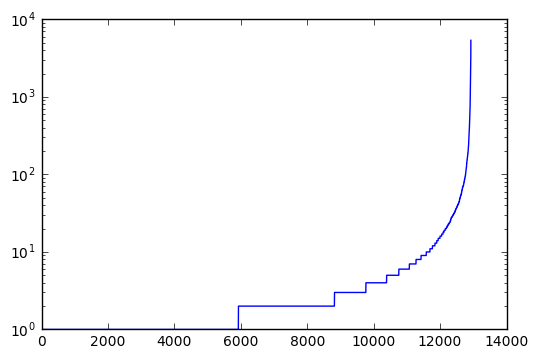

In [118]:
EMOTION = 3
print(emoNames[EMOTION])

train_tweets, train_labels = dataframe_to_lists(dfs['train'][emoNames[EMOTION]])
dev_tweets, dev_labels = dataframe_to_lists(dfs['dev'][emoNames[EMOTION]])
test_tweets, test_labels = dataframe_to_lists(dfs['test'][emoNames[EMOTION]])

print("max tweet length: %d tokens" %(_get_maxlen(train_tweets+dev_tweets+test_tweets)) )


meltTweets = []
# meltTweets.extend(train_tweets)
for dataset in ['train','test','dev']:
    for emo in emoNames:
        try:
            meltTweets.extend(dfs[dataset][emo]['tweet'])    
        except:
            print('KeyError: ',emo)
print('all tweets melted into list, ',len(meltTweets))

def _get_unique_tokens(tweets):    
    return(Counter(token for tweet in tweets for token in tweet.split()))

wordFrequencies = _get_unique_tokens(meltTweets) 
_plot_word_frequencies(wordFrequencies, WORD_FREQUENCY_TRESHOLD = WORD_FREQUENCY_TRESHOLD)

### Preparing for SVR

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

def _save_ngramizer(ngramizer, filename = 'ngramizer.dump'):
    checkFolder(filename)
    _ = joblib.dump(ngramizer, filename=filename, compress=9)
    print('ngramizer saved\t<'+filename+'>')
    
def _load_ngramizer(filename = 'ngramizer.dump'):
    checkFolder(filename)
    ngramizer = joblib.load(filename = filename)
    print('ngramizer <'+filename+'> loaded')
    return ngramizer

NGRAM_VALUE = 4
WORD_FREQUENCY_TRESHOLD = 2
print('NGRAM_VALUE =',NGRAM_VALUE)
    
vectorizer = CountVectorizer(ngram_range = (1,NGRAM_VALUE),token_pattern=r'\b\w+\b', min_df=WORD_FREQUENCY_TRESHOLD,max_df=1000)
# ngramizer = vectorizer.fit(meltTweets)
ngramizer = vectorizer.fit(train_tweets+dev_tweets)

vec = ngramizer.transform(train_tweets+dev_tweets).toarray()
print(len(vec), len(vec[0]))
    
_save_ngramizer(ngramizer, filename = '/home/vlaand/IpythonNotebooks/wassa2017/ngramizers/wassa_ngramizer_'+emoNames[EMOTION]+'.dump')
_save_ngramizer(ngramizer, filename = '/home/vlaand/IpythonNotebooks/05_emotion_wassa_nuig/wassaRegression/ngramizers/ngramizer.'+emoNames[EMOTION]+'.dump')

NGRAM_VALUE = 4
860 4763
ngramizer saved	</home/vlaand/IpythonNotebooks/wassa2017/ngramizers/wassa_ngramizer_sadness.dump>
ngramizer saved	</home/vlaand/IpythonNotebooks/05_emotion_wassa_nuig/wassaRegression/ngramizers/ngramizer.sadness.dump>


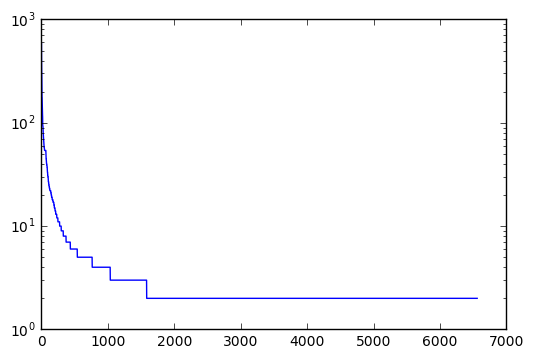

In [112]:
### NGRAM FREQUENCY

from natsort import natsorted
    
train_data_features = vec#X_train_counts.toarray()
vocab = ngramizer.get_feature_names()
dist = np.sum(train_data_features, axis=0)
ngram_freq = {}

# For each, print the vocabulary word and the frequency
for tag, count in zip(vocab, dist):
    #print(tag, count)
    ngram_freq[tag]=count

semilogy(natsorted(list(ngram_freq.values()),reverse=True))
show()

In [49]:
import numpy as np
import math, itertools
from scipy import spatial
def _vectors_similarity(v1 , v2):
    return( 1 - spatial.distance.cosine(v1,v2) )
def similarityVector(vector_, vectors_):
    resVector = np.asarray([_vectors_similarity(vector_ , v_) for v_ in vectors_])
    return np.asarray([np.max(resVector), np.mean(resVector), np.std(resVector), np.min(resVector)])
def compareTokenToSentence(leftToken, sentence):
    sentence_vectors = []
    for token in sentence:
        if token in Dictionary:
            sentence_vectors.append(Dictionary[token])
        else:
            token = token.replace('#','')
            if token in Dictionary:
                sentence_vectors.append(Dictionary[token])
    return similarityVector( Dictionary[leftToken], sentence_vectors)  
def capitalRatio(tweet):
        firstCap, allCap = 0, 0
        length = len(tweet)
        if length==0:
            return np.array([0,0])
        for i,token in enumerate(tweet.split()):
            if( token.istitle() ):
                firstCap += 1
            elif( token.isupper() ):
                allCap += 1
        return np.asarray([firstCap/length,allCap/length]) 
def tweetToWordVectors(dictionary, tweet, fixedLength=False):
    output = []    
    if(fixedLength):
        for i in range(MAX_SEQUENCE_LENGTH):
            output.append(blankVector)
        for i,token in enumerate(tweet.split()):
            if token in Dictionary:
                output[i] = Dictionary[token]                
    else:
         for i,token in enumerate(tweet.lower().split()):
            if token in Dictionary:
                output.append(Dictionary[token])
            elif token.replace('#','') in Dictionary:
                output.append(Dictionary[token.replace('#','')])
    return output
def ModWordVectors(x, mod=True):
    if(len(x) == 0):       
        if(mod):
            return(np.zeros(EMBEDDINGS_DIM*3, dtype='float32'))
        else:
            return(np.zeros(EMBEDDINGS_DIM, dtype='float32'))        
    m =  np.matrix(x)
    if(mod):
        xMean = np.array(m.mean(0))[0]
        xMin = np.array(m.min(0))[0]
        xMax = np.array(m.max(0))[0]
        xX = np.concatenate((xMean,xMin,xMax))
        return xX
    else:
        return np.array(m.mean(0))[0]
def bindTwoVectors(x0,x1):
    return np.array(list(itertools.chain(x0,x1)),dtype='float32') 
def _bind_vectors(x):
    return np.concatenate(x)   
def myLog10(vector):
    for i,v in enumerate(vector):
        if v > 0:
            vector[i] = np.log(v)
    return vector            
def _convert_text_to_vector(tweets,  Dictionary, labels, ngramizer):
    _X = []
    _y = []
    vec = ngramizer.transform(tweets).toarray()
    for i, t in enumerate(tweets):
        embeddingsVector = ModWordVectors(tweetToWordVectors(Dictionary,tweets[i]))
#         capitalRatioVector = capitalRatio(dfs[st][emoNames[EMOTION]][i])
        simVector = compareTokenToSentence(leftToken = emoNames[EMOTION], sentence = t)
        ngramVector = vec[i]
        _X.append( _bind_vectors((ngramVector, embeddingsVector, simVector))  )
#         _X.append( _bind_vectors((ngramVector, embeddingsVector))  )
        _y.append(labels[i])
    return(np.asarray(_X), np.asarray(_y))

In [120]:
print('chosen emotion:', emoNames[EMOTION])

svr_X, svr_y = _convert_text_to_vector(
    tweets = train_tweets+dev_tweets+test_tweets,
    labels = train_labels+dev_labels+test_labels, 
    Dictionary = Dictionary, 
    ngramizer = ngramizer)

print('\tdata shape:\t', svr_X.shape, svr_y.shape)  

# svr_X_train, svr_y_train = _convert_text_to_vector(
#     tweets = train_tweets,
#     labels = train_labels, 
#     Dictionary = Dictionary, 
#     ngramizer = ngramizer)

# svr_X_dev, svr_y_dev = _convert_text_to_vector(
#     tweets = dev_tweets,
#     labels = dev_labels, 
#     Dictionary = Dictionary, 
#     ngramizer = ngramizer)



# print('\tdata shape:\t', svr_X_train.shape, svr_y_train.shape)   
# print('\tdata shape:\t', svr_X_dev.shape, svr_y_dev.shape)  

svr_X_test, svr_y_test = _convert_text_to_vector(
    tweets = test_tweets,
    labels = test_labels, 
    Dictionary = Dictionary, 
    ngramizer = ngramizer)

print('\tdata shape:\t', svr_X_test.shape, svr_y_test.shape)  

chosen emotion: sadness
	data shape:	 (1533, 5067) (1533,)
	data shape:	 (673, 5067) (673,)


In [81]:
from sklearn.svm import SVR, LinearSVR
from sklearn.externals import joblib
from sklearn.metrics import f1_score, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import r2_score, f1_score, classification_report
from scipy.stats import pearsonr, spearmanr
from collections import Counter
from multiprocessing import Pool
import warnings

In [121]:
warnings.simplefilter('ignore')

ESTIMATOR = 'LinearSVR'
# ESTIMATOR = 'SVR'
cv_folds = 5
# NGRAM_VALUE = 4

def _greed_search(EMOTION=0):     

    list_acc = []    
    list_val = []
        
    if(ESTIMATOR == 'LinearSVR'):                             
        epsilon = 0.001
        gamma=1.0
#         C = 0.01
        for tol in [1e-6,1e-5,1e-4]:
            for C in [0.001,0.01,0.1]:
#                 cvs = cross_val_score(estimator = LinearSVR(C=C, tol=tol), X=X, y=y, cv=cv_folds, n_jobs=cv_folds, scoring='r2') 
#                 meanScore = np.mean(np.asarray(cvs))
    
                svcTrained = LinearSVR(C=C, tol=tol) 
                svcTrained.fit(svr_X, svr_y)

                svr_y_test_predict = svcTrained.predict(svr_X_test)
                prs = pearsonr(svr_y_test , svr_y_test_predict)[0]
                spr = spearmanr(svr_y_test , svr_y_test_predict)[0]
                    
                list_val.append([emoNames[EMOTION],prs,ESTIMATOR, C, gamma,epsilon,tol,NGRAM_VALUE,EMBEDDINGS_DIM])
                list_acc.append(prs)
                print(emoNames[EMOTION]+': C='+str(C)+', tol='+str(tol)+', prs='+str(prs)+', spr='+str(spr))      
        
    elif(ESTIMATOR == 'SVR'):                          
        epsilon = 0.001
#         C = 1.0
#         tol = 1e-6
        gamma=0.01
        for tol in [1e-5,1e-4]:
            for gamma in [0.001,0.01,0.1]:       
            
                for C in [0.1,1.0]:                    
#                     cvs = [0.5,0.5,0.5]
#                     cvs = cross_val_score(estimator = SVR(C=C,gamma=gamma, tol=tol), X=X, y=y, cv=cv_folds, n_jobs=cv_folds, scoring='r2') 
#                     meanScore = np.mean(np.asarray(cvs))
                    svcTrained = SVR(C=C, tol=tol,gamma=gamma) 
                    svcTrained.fit(svr_X, svr_y)

                    svr_y_test_predict = svcTrained.predict(svr_X_test)
                    prs = pearsonr(svr_y_test , svr_y_test_predict)[0]
                    spr = spearmanr(svr_y_test , svr_y_test_predict)[0]

                    list_val.append([emoNames[EMOTION],prs, ESTIMATOR, C, gamma,epsilon,tol,NGRAM_VALUE,EMBEDDINGS_DIM])
                    list_acc.append(prs)
                    print(emoNames[EMOTION]+': C='+str(C)+', gamma='+str(gamma)+', tol='+str(tol)+', prs='+str(prs)+', spr='+str(spr))
    
    best = np.argmax(list_acc)    
    print(list_val[best])
    out0 = {
        'C':list_val[best][3], 
        'gamma': list_val[best][4],
        'epsilon': list_val[best][5],
        'tol': list_val[best][6],
        'ngrams': list_val[best][7],
        'EMBEDDINGS_DIM': list_val[best][8],
        'score': list_val[best][1]
    }

    return {emoNames[EMOTION]:out0}
    
def _combine_best_results(pool_output, ESTIMATOR):
    new_p = {ESTIMATOR:{}}   
    for i in pool_output:
        new_p[ESTIMATOR].update(i)
        
    return new_p            


pool_output = [_greed_search(EMOTION)]
temp_params = _combine_best_results(pool_output, ESTIMATOR)

try:
    train_params[ESTIMATOR].update(temp_params[ESTIMATOR])
except:
    train_params = {}
    train_params.update(temp_params)

sadness: C=0.001, tol=1e-06, prs=0.768512103566, spr=0.783924038069
sadness: C=0.01, tol=1e-06, prs=0.89002147452, spr=0.898344520037
sadness: C=0.1, tol=1e-06, prs=0.976007692212, spr=0.980791918245
sadness: C=0.001, tol=1e-05, prs=0.768511493916, spr=0.783980371383
sadness: C=0.01, tol=1e-05, prs=0.889992879616, spr=0.898229608741
sadness: C=0.1, tol=1e-05, prs=0.97601559873, spr=0.980727413548
sadness: C=0.001, tol=0.0001, prs=0.768483315002, spr=0.783967316861
sadness: C=0.01, tol=0.0001, prs=0.889975530316, spr=0.898141062459
sadness: C=0.1, tol=0.0001, prs=0.97599627848, spr=0.980804067023
['sadness', 0.97601559873008892, 'LinearSVR', 0.1, 1.0, 0.001, 1e-05, 4, 100]


In [53]:
train_params = {'LSTM': {'anger': {'nb_epoch': 12},
  'fear': {'nb_epoch': 36},
  'joy': {'nb_epoch': 8},
  'sadness': {'nb_epoch': 18}},
 'LinearSVR': {'anger': {'C': 0.1,
   'EMBEDDINGS_DIM': 100,
   'epsilon': 0.001,
   'gamma': 1.0,
   'ngrams': 4,
   'score': 0.95816165303133261,
   'tol': 1e-05},
  'fear': {'C': 0.1,
   'EMBEDDINGS_DIM': 100,
   'epsilon': 0.001,
   'gamma': 1.0,
   'ngrams': 4,
   'score': 0.96097704320011335,
   'tol': 1e-05},
  'joy': {'C': 0.1,
   'EMBEDDINGS_DIM': 100,
   'epsilon': 0.001,
   'gamma': 1.0,
   'ngrams': 4,
   'score': 0.96744036403654121,
   'tol': 1e-05},
  'sadness': {'C': 0.1,
   'EMBEDDINGS_DIM': 100,
   'epsilon': 0.001,
   'gamma': 1.0,
   'ngrams': 4,
   'score': 0.97601559873008892,
   'tol': 1e-05}},
 'SVR': {'anger': {'C': 1.0,
   'EMBEDDINGS_DIM': 100,
   'epsilon': 0.001,
   'gamma': 0.01,
   'ngrams': 4,
   'score': 0.5909199703343438,
   'tol': 0.0001},
  'fear': {'C': 1.0,
   'EMBEDDINGS_DIM': 100,
   'epsilon': 0.001,
   'gamma': 0.01,
   'ngrams': 4,
   'score': 0.6669056665602984,
   'tol': 0.0001},
  'joy': {'C': 1.0,
   'EMBEDDINGS_DIM': 100,
   'epsilon': 0.001,
   'gamma': 0.01,
   'ngrams': 4,
   'score': 0.6182783505906371,
   'tol': 1e-05},
  'sadness': {'C': 1.0,
   'EMBEDDINGS_DIM': 100,
   'epsilon': 0.001,
   'gamma': 0.001,
   'ngrams': 4,
   'score': 0.6839620329687072,
   'tol': 1e-05}}}

In [124]:
# ESTIMATOR = 'LinearSVR'
ESTIMATOR = 'SVR'


if ESTIMATOR == 'SVR':
    svrTrained = SVR(C=train_params[ESTIMATOR][emoNames[EMOTION]]['C'], 
                 tol=train_params[ESTIMATOR][emoNames[EMOTION]]['tol'], 
                 gamma=train_params[ESTIMATOR][emoNames[EMOTION]]['gamma'], 
                 epsilon=train_params[ESTIMATOR][emoNames[EMOTION]]['epsilon'])
    
else:
    svrTrained = LinearSVR(C=train_params[ESTIMATOR][emoNames[EMOTION]]['C'], 
                 tol=train_params[ESTIMATOR][emoNames[EMOTION]]['tol'], 
                 epsilon=train_params[ESTIMATOR][emoNames[EMOTION]]['epsilon'])
    
svrTrained.fit(svr_X, svr_y)
print(svrTrained)

       
def saveModelFor(model, ESTIMATOR, EMOTION=0, path='/home/vlaand/IpythonNotebooks/wassa2017/'):
    path = os.path.join(path,ESTIMATOR)
    checkFolder(path)
    filename = os.path.join(path,emoNames[EMOTION]+'.dump')
    checkFolder(filename)
    _ = joblib.dump(model, filename, compress=9)
    print("'%s' model saved to <%s>" % (emoNames[EMOTION],filename))
    
saveModelFor(svrTrained, ESTIMATOR=ESTIMATOR, EMOTION=EMOTION, path = '/home/vlaand/IpythonNotebooks/wassa2017/classifiers/')
saveModelFor(svrTrained, ESTIMATOR=ESTIMATOR, EMOTION=EMOTION, path = '/home/vlaand/IpythonNotebooks/05_emotion_wassa_nuig/wassaRegression/classifiers/')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=1e-05, verbose=False)
'sadness' model saved to </home/vlaand/IpythonNotebooks/wassa2017/classifiers/SVR/sadness.dump>
'sadness' model saved to </home/vlaand/IpythonNotebooks/05_emotion_wassa_nuig/wassaRegression/classifiers/SVR/sadness.dump>


### Preparing for LSTM

In [199]:
# X_train, y_train, embedding_matrix = lists_to_vectors(train_tweets, train_labels)
# X_dev, y_dev, embedding_matrix = lists_to_vectors(dev_tweets, dev_labels)
X_test, y_test, embedding_matrix = lists_to_vectors(test_tweets, test_labels)

# X, y, embedding_matrix = lists_to_vectors(train_tweets+dev_tweets+test_tweets, train_labels+dev_labels+test_labels)
X, y, embedding_matrix = lists_to_vectors(train_tweets+dev_tweets, train_labels+dev_labels)

matrix created
	 (1193515, 100)
673 train sequences loaded
	 (673, 55) 
	 (673,)
matrix created
	 (1193515, 100)
860 train sequences loaded
	 (860, 55) 
	 (860,)


## Training on WASSA dataset

In [200]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from multiprocessing import Pool, Manager
import os
import numpy as np

import keras.backend as K

def matthews_correlation(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + K.epsilon())

In [261]:
def _cross_validation_parallel(_input):
    train, test = _input
    
    model = Sequential()
    model.add(Embedding(len(Indices)+1,  EMBEDDINGS_DIM, weights=[embedding_matrix],
                                input_length=maxlen, trainable=True))
    model.add(Bidirectional(LSTM(EMBEDDINGS_DIM))) #dropout is same as regularisation
    model.add(Dropout(0.2))
    model.add(Dense(hidden_dims1, W_regularizer=l2(0.01)), )
    model.add(Dense(hidden_dims2, W_regularizer=l2(0.01)), ) #!!!
    model.add(Dense(hidden_dims3, activation='softsign'))
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy', matthews_correlation])
        
    model.fit(X[train], y[train], batch_size=batch_size, nb_epoch=nb_epoch, validation_split=None)
    
#     scores = model.evaluate(X[test], y[test], verbose=0,)
    y_test_predict = model.predict(X[test])
    y_test_predict = np.reshape(y_test_predict, newshape=(len(y_test_predict),))
    
    scores =  [r2_score(y_test_predict, y[test]), pearson(y_test_predict, y[test]), spearman(y_test_predict, y[test])]

    print("%s: %.2f" % (model.metrics_names[2], scores[1]))
    return scores

nb_epoch = 10
n_splits = 5
hidden_dims1 = 50
hidden_dims2 = 25
hidden_dims3 = 1
np.random.seed(1337)

# with open('senpy-plugins-development/fivePointRegression/classifiers/LSTM/log.out', "w") as log_file:
#     log_file.write(str(cvscores)+'\n')
#     log_file.write("%.2f (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1337)

with Pool(processes = n_splits) as p:
    cvscores = p.map(_cross_validation_parallel, ((train, test) for (train, test) in kfold.split(X, y)))

# print("%.2f (+/- %.2f)" % (np.mean(cvscores), np.std(cvscores)))


print('%s' % (emoNames[EMOTION].upper()))
print('%d folds, %d epochs' % (n_splits,nb_epoch))
print()

my_metrics = ['r2_score', 'pearson', 'spearman']
for func in range(3):
    print("%s:\t%.2f (+/- %.2f)" % (my_metrics[func],np.mean([i[func] for i in cvscores]), np.std([i[func] for i in cvscores])))

# p._pool[0].is_alive()

JOY
5 folds, 50 epochs

r2_score:	0.03 (+/- 0.18)
pearson:	0.67 (+/- 0.05)
spearman:	0.65 (+/- 0.05)


## Final Training

In [50]:
try:
    train_params.update(
        {'LSTM':{
            'anger':{'nb_epoch':12},
            'joy':{'nb_epoch':8},
            'fear':{'nb_epoch':36},
            'sadness':{'nb_epoch':18 }}}
    )
except:
    train_params = {'LSTM':{
            'anger':{'nb_epoch':12},
            'joy':{'nb_epoch':8},
            'fear':{'nb_epoch':36},
            'sadness':{'nb_epoch':18 }}}

In [201]:
hidden_dims1 = 50
hidden_dims2 = 25
hidden_dims3 = 1
model = Sequential()
model.add(Embedding(len(Indices)+1,  EMBEDDINGS_DIM, weights=[embedding_matrix],
                            input_length=maxlen, trainable=True))
model.add(Bidirectional(LSTM(EMBEDDINGS_DIM))) #dropout is same as regularisation
model.add(Dropout(0.2))
model.add(Dense(hidden_dims1, b_regularizer=l2(0.01)), )
model.add(Dense(hidden_dims2, b_regularizer=l2(0.01)), ) 
model.add(Dense(hidden_dims3, activation='softsign'))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[matthews_correlation])

model.fit(X, y, batch_size=batch_size, nb_epoch=train_params['LSTM'][emoNames[EMOTION]]['nb_epoch'],validation_split=None,)

Epoch 1/18
860/860 [==============================] - 34s - loss: 0.1928 - matthews_correlation: 0.0298    
Epoch 2/18
860/860 [==============================] - 33s - loss: 0.1608 - matthews_correlation: 0.1136    
Epoch 3/18
860/860 [==============================] - 34s - loss: 0.1498 - matthews_correlation: 0.2615    
Epoch 4/18
860/860 [==============================] - 33s - loss: 0.1326 - matthews_correlation: 0.3790    
Epoch 5/18
860/860 [==============================] - 33s - loss: 0.1125 - matthews_correlation: 0.5909    
Epoch 6/18
860/860 [==============================] - 33s - loss: 0.0957 - matthews_correlation: 0.6692    
Epoch 7/18
860/860 [==============================] - 34s - loss: 0.0875 - matthews_correlation: 0.7142    
Epoch 8/18
860/860 [==============================] - 33s - loss: 0.0787 - matthews_correlation: 0.7593    
Epoch 9/18
860/860 [==============================] - 33s - loss: 0.0729 - matthews_correlation: 0.7834    
Epoch 10/18
860/860 [=======

In [202]:
# y_t_pred = model.predict(X_dev)

y_dev_pred = np.array([y_[0] for y_ in model.predict(X_dev)])
print(min(y_dev_pred), max(y_dev_pred))
print("%8s\t%.2f\t%.2f\t%.2f" % (emoNames[EMOTION],
                                 r2_score(y_dev , y_dev_pred),                                 
                                 pearsonr(y_dev , y_dev_pred)[0],
                                 spearmanr(y_dev , y_dev_pred)[0]))


y_test_pred = np.array([y_[0] for y_ in model.predict(X_test)])
print(min(y_test_pred), max(y_test_pred))
print("%8s\t%.2f\t%.2f\t%.2f" % (emoNames[EMOTION],
                                 r2_score(y_test , y_test_pred),                                 
                                 pearsonr(y_test , y_test_pred)[0],
                                 spearmanr(y_test , y_test_pred)[0]))

0.328336 0.72836
 sadness	0.03	0.33	0.27
0.204091 0.824076
 sadness	0.45	0.70	0.69


In [203]:
len(svr_y_test_predict), len(y_test_predict), len(mix_y_test_predict)

(714, 714, 714)

In [204]:
svr_y_test_predict = svcTrained.predict(svr_X_test)
y_test_predict = np.array([y_[0] for y_ in model.predict(X_test)])
mix_y_test_predict = np.array([ np.mean([y1,y2]) for y1,y2 in zip(y_test_predict, svr_y_test_predict) ])

print("%8s\t%.2f\t%.2f\t%.2f" % (emoNames[EMOTION]+'.svr',
                                 r2_score(svr_y_test , svr_y_test_predict),                                 
                                 pearsonr(svr_y_test , svr_y_test_predict)[0],
                                 spearmanr(svr_y_test , svr_y_test_predict)[0]))
print("%8s\t%.2f\t%.2f\t%.2f" % (emoNames[EMOTION]+'.lstm',
                                 r2_score(y_test , y_test_predict),                                 
                                 pearsonr(y_test , y_test_predict)[0],
                                 spearmanr(y_test , y_test_predict)[0]))
print("%8s\t%.2f\t%.2f\t%.2f" % (emoNames[EMOTION]+'.avg',
                                 r2_score(y_test , mix_y_test_predict),                                 
                                 pearsonr(y_test , mix_y_test_predict)[0],
                                 spearmanr(y_test , mix_y_test_predict)[0]))


sadness.svr	0.43	0.68	0.69
sadness.lstm	0.45	0.70	0.69
sadness.avg	0.49	0.73	0.72


Populating the interactive namespace from numpy and matplotlib


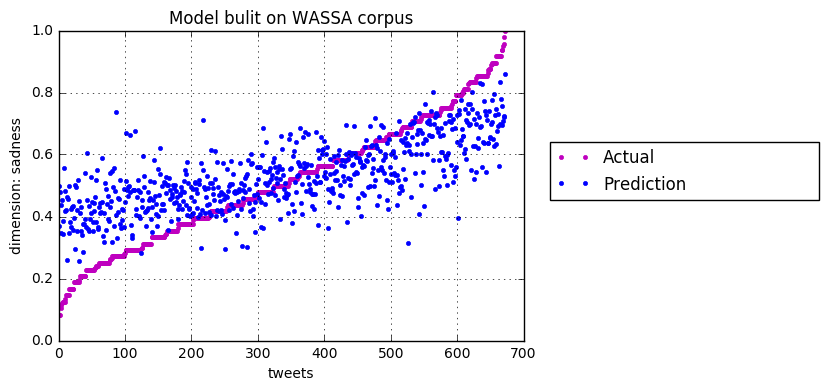

In [206]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import natsort

dimension = EMOTION

s = y_test#[:, dimension] #y_annotated[dimension]
order = sorted(range(len(s)), key=lambda k: s[k])

g1 = y_test#[:, dimension]
g2 = mix_y_test_predict#[yy[dimension] for yy in y_wassa_test_predict]#[:, dimension]    

line_0, = plt.plot(np.array(g1)[order], 'm.',  label='Actual')
line_1, = plt.plot(np.array(g2)[order], 'b.', label='Prediction')
plt.grid(True)
plt.legend(handles=[line_0, line_1])
plt.legend(bbox_to_anchor=(1.02, .4, .65, .0), loc=3,ncol=1, mode="expand", borderaxespad=1.0)
plt.ylabel('dimension: '+emoNames[dimension])
plt.xlabel('tweets')
plt.title("Model bulit on WASSA corpus")
plt.show()

In [20]:
from sklearn.metrics import r2_score, f1_score, classification_report
# from skll.metrics import pearson, spearman
from scipy.stats import pearsonr, spearmanr


# print('[%8s]\tR2\tpearson\tspearman' % emoNames[EMOTION])
# y_dev_predicts = []
# for i in range(20):
#     if i>0: 
#         model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=1,validation_split=None,)
#     y_dev_pred = np.array([y_[0] for y_ in model.predict(X_dev)])
#     print("%8s\t%.2f\t%.2f\t%.2f" % (i,
#                                  r2_score(y_dev , y_dev_pred),                                 
#                                  pearsonr(y_dev , y_dev_pred)[0],
#                                  spearmanr(y_dev , y_dev_pred)[0]))    
#     y_dev_predicts.append(y_dev_pred)


# model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,validation_split=None,)

In [73]:
# print('[%8s]\tR2\tpearson\tspearman' % emoNames[EMOTION])
# for i,y__ in enumerate(y_dev_predicts):  
#         y_test_predict = y__
#         print("%8s\t%.2f\t%.2f\t%.2f" % (i,
#                                  r2_score(y_dev , y_test_predict),                                 
#                                  pearsonr(y_dev , y_test_predict)[0],
#                                  spearmanr(y_dev , y_test_predict)[0]))

[ sadness]	R2	pearson	spearman
       0	-0.40	-0.12	-0.13
       1	0.07	0.43	0.44
       2	0.17	0.53	0.54
       3	0.11	0.46	0.50
       4	0.21	0.49	0.54
       5	0.17	0.47	0.49
       6	0.21	0.48	0.54
       7	0.11	0.56	0.59
       8	0.14	0.50	0.56
       9	0.20	0.49	0.54
      10	0.10	0.48	0.52
      11	0.16	0.51	0.54
      12	0.18	0.50	0.53
      13	0.15	0.50	0.55
      14	0.18	0.51	0.53
      15	0.18	0.51	0.55
      16	0.19	0.52	0.56
      17	0.21	0.53	0.54
      18	0.23	0.54	0.56
      19	0.17	0.50	0.54


Populating the interactive namespace from numpy and matplotlib


/home/vlaand/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


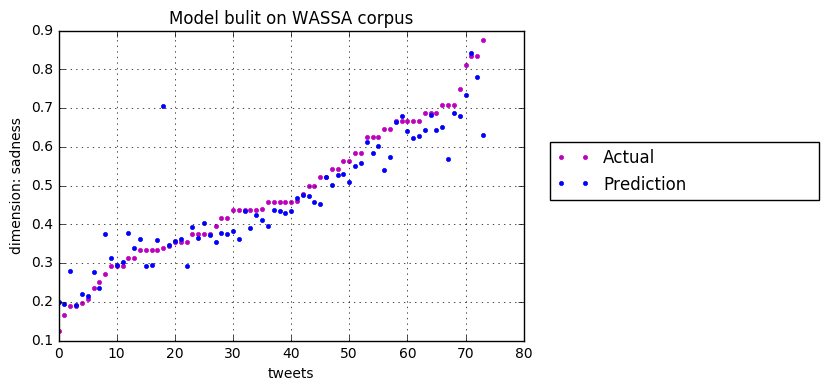

In [48]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import natsort

dimension = EMOTION

s = y_dev#[:, dimension] #y_annotated[dimension]
order = sorted(range(len(s)), key=lambda k: s[k])

g1 = y_dev#[:, dimension]
g2 = y_dev_pred#[yy[dimension] for yy in y_wassa_test_predict]#[:, dimension]    

line_0, = plt.plot(np.array(g1)[order], 'm.',  label='Actual')
line_1, = plt.plot(np.array(g2)[order], 'b.', label='Prediction')
plt.grid(True)
plt.legend(handles=[line_0, line_1])
plt.legend(bbox_to_anchor=(1.02, .4, .65, .0), loc=3,ncol=1, mode="expand", borderaxespad=1.0)
plt.ylabel('dimension: '+emoNames[dimension])
plt.xlabel('tweets')
plt.title("Model bulit on WASSA corpus")
plt.show()

#### Method 1 (save architecture and weights separately)

In [49]:
def _save_model_wassa(model, savePath, emo, modelName):
    if emo == None:
        savePath = os.path.join(savePath,modelName)
    else:
        savePath = os.path.join(savePath,modelName)+"."+emo
        
    model_json = model.to_json()
    with open(savePath + ".json", "w") as json_file:
        json_file.write(model_json)
        print("<%s.json> " % (savePath))
        
    model.save_weights(savePath +".h5", overwrite=True)
    print("<%s.h5> " % (savePath))
    
#     model.save(savePath + "_.h5")
    
# savePath = "/home/vlaand/IpythonNotebooks/senpy-plugins-NUIG/fivePointRegression/classifiers/LSTM/"
savePath = "/home/vlaand/IpythonNotebooks/05_emotion_wassa_nuig/wassaRegression/classifiers/LSTM/"

_save_model_wassa(model=model, savePath=savePath, emo=emoNames[EMOTION], modelName="wassaRegression")
_save_model_wassa(model=model, savePath='/home/vlaand/IpythonNotebooks/wassa2017/classifiers/LSTM/', emo=emoNames[EMOTION], modelName="wassaRegression")

emoNames[EMOTION]

</home/vlaand/IpythonNotebooks/05_emotion_wassa_nuig/wassaRegression/classifiers/LSTM/wassaRegression.sadness.json> 
</home/vlaand/IpythonNotebooks/05_emotion_wassa_nuig/wassaRegression/classifiers/LSTM/wassaRegression.sadness.h5> 
</home/vlaand/IpythonNotebooks/wassa2017/classifiers/LSTM/wassaRegression.sadness.json> 
</home/vlaand/IpythonNotebooks/wassa2017/classifiers/LSTM/wassaRegression.sadness.h5> 


'sadness'

In [359]:
from keras.models import model_from_json

with open('/home/vlaand/IpythonNotebooks/wassa2017/classifiers/LSTM/wassaRegression.'+emoNames[EMOTION]+'.json', 'r') as json_file:
    loaded_model = model_from_json(json_file.read())
    loaded_model.load_weights(json_file.name.replace('.json','.h5'))
    print('<%s> loaded' %(json_file.name))
    print('<%s> weights loaded' % (json_file.name.replace('.json','.h5')))

</home/vlaand/IpythonNotebooks/wassa2017/classifiers/LSTM/wassaRegression.anger.json> loaded
</home/vlaand/IpythonNotebooks/wassa2017/classifiers/LSTM/wassaRegression.anger.h5> weights loaded
